In [2]:
print('hello, World!')

hello, World!


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('../data files/Monthly_COVID-19_Death.csv')
df4 = pd.read_csv('../data files/Provisional_COVID-19_death_counts.csv')

# Data Cleaning

## dataset 1

Starting with Dataset 1

In [5]:
df1_cleaned = df1.drop_duplicates().dropna()

In [6]:
print(df1_cleaned['subgroup1'].unique())

['Hispanic' 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander' '30-39 years'
 '40-49 years' '50-64 years' '65-74 years' '75+ years' '18-29 years'
 '12-17 years' '0-4 years' '5-11 years']


In [7]:
print(df1_cleaned['subgroup2'].unique())

['30-39 years' '40-49 years' '50-64 years' '65-74 years' '75+ years'
 '18-29 years' '12-17 years' '0-4 years' '5-11 years' 'Hispanic'
 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander']


In [8]:
ages = []
ethnicities = []



for i, row in df1_cleaned.iterrows():
    if 'years' in row['subgroup1']:
        ages.append(row.subgroup1)
        ethnicities.append(row.subgroup2)
    else:
        ethnicities.append(row.subgroup1)
        ages.append(row.subgroup2)

set(ages)
set(ethnicities)

df1_cleaned['Ages'] = ages
df1_cleaned['Races'] = ethnicities

df1_cleaned = df1_cleaned.drop(columns = ['subgroup1', 'subgroup2', 'note'])

In [9]:
df1_cleaned.sample(10)

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,Ages,Races
54972,06/13/2024,Region 4,12/01/2020,12/31/2020,Age and Race,19.0,0.74,0.41,1.07,18-29 years,Non-Hispanic Black
23450,06/13/2024,Region 4,01/01/2022,01/31/2022,Race and Age,10.0,0.79,0.30,1.27,12-17 years,Non-Hispanic Black
20921,06/13/2024,Region 3,04/01/2023,04/30/2023,Race and Age,10.0,2.09,0.80,3.39,65-74 years,Non-Hispanic Black
58933,06/13/2024,Region 5,03/01/2024,03/31/2024,Age and Race,10.0,0.22,0.08,0.35,40-49 years,Non-Hispanic White
14640,06/13/2024,Region 10,01/01/2021,01/31/2021,Race and Age,10.0,5.74,2.18,9.30,50-64 years,Non-Hispanic Asian
19520,06/13/2024,Region 3,05/01/2021,05/31/2021,Race and Age,19.0,32.15,17.69,46.60,75+ years,Hispanic
33569,06/13/2024,Region 8,09/01/2021,09/30/2021,Race and Age,13.0,4.35,1.98,6.71,30-39 years,Hispanic
47405,06/13/2024,Region 10,12/01/2021,12/31/2021,Age and Race,15.0,1.04,0.51,1.57,30-39 years,Non-Hispanic White
60574,06/13/2024,Region 6,01/01/2024,01/31/2024,Age and Race,16.0,22.94,11.70,34.19,75+ years,Non-Hispanic Asian
47450,06/13/2024,Region 10,04/01/2021,04/30/2021,Age and Race,11.0,0.85,0.35,1.36,40-49 years,Non-Hispanic White


In [10]:
df1_cleaned.columns

Index(['data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'covid_deaths', 'crude_rate',
       'conf_int_95pct_lower_crude', 'conf_int_95pct_upper_crude', 'Ages',
       'Races'],
      dtype='object')

In [11]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3278 entries, 10656 to 73270
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data_as_of                  3278 non-null   object 
 1   jurisdiction_residence      3278 non-null   object 
 2   data_period_start           3278 non-null   object 
 3   data_period_end             3278 non-null   object 
 4   group                       3278 non-null   object 
 5   covid_deaths                3278 non-null   float64
 6   crude_rate                  3278 non-null   float64
 7   conf_int_95pct_lower_crude  3278 non-null   float64
 8   conf_int_95pct_upper_crude  3278 non-null   float64
 9   Ages                        3278 non-null   object 
 10  Races                       3278 non-null   object 
dtypes: float64(4), object(7)
memory usage: 307.3+ KB


In [12]:
# Convert the 'data_period_start' column to datetime format
df1_cleaned['data_period_start'] = pd.to_datetime(df1_cleaned['data_period_start'], format='%m/%d/%Y')
 
# Create new columns for month (full name) and year
df1_cleaned['month_full'] = df1_cleaned['data_period_start'].dt.strftime('%B')
df1_cleaned['year'] = df1_cleaned['data_period_start'].dt.year

df1_cleaned.columns

Index(['data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'covid_deaths', 'crude_rate',
       'conf_int_95pct_lower_crude', 'conf_int_95pct_upper_crude', 'Ages',
       'Races', 'month_full', 'year'],
      dtype='object')

## dataset 4

Now on to dataset 4

In [13]:
df4_cleaned = df4.drop_duplicates()
# cannot use .dropna()

In [14]:
print(df4_cleaned['subgroup1'].unique())

['Female' 'Male' '0-4 years' '12-17 years' '18-29 years' '30-39 years'
 '40-49 years' '5-11 years' '50-64 years' '65-74 years'
 '75 years and over' 'Hispanic'
 'Non-Hispanic American Indian or Alaska Native' 'Non-Hispanic Asian'
 'Non-Hispanic Asian, Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic Black'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']


In [15]:
print(df4_cleaned['subgroup2'].unique())

[nan '0-4 years' '12-17 years' '18-29 years' '30-39 years' '40-49 years'
 '5-11 years' '50-64 years' '65-74 years' '75 years and over']


In [16]:
df4_ages = []
df4_ethnicities = []



for i, row in df4_cleaned.iterrows():
    if 'years' in row['subgroup1']:
        df4_ages.append(row.subgroup1)
        df4_ethnicities.append(row.subgroup2)
    else:
        df4_ethnicities.append(row.subgroup1)
        df4_ages.append(row.subgroup2)

set(df4_ages)
set(df4_ethnicities)

df4_cleaned['Ages'] = df4_ages
df4_cleaned['Races'] = df4_ethnicities

df4_cleaned = df4_cleaned.drop(columns = ['subgroup1', 'subgroup2', 'group', 'footnote'])

df4_sex = []

for val in df4_cleaned['Races']:
    if val in ['Male', 'Female']:
        df4_sex.append(val)
    else:
        df4_sex.append(np.nan)

df4_cleaned['Sex'] = df4_sex

In [17]:
print(df4_cleaned['Sex'].unique())

['Female' 'Male' nan]


In [18]:
df4_cleaned.sample(15)

,data_as_of,jurisdiction_residence,year,month,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,Ages,Races,Sex
39706,07/11/2024 12:00:00 AM,Region 6,2023,9,0.0,0.0,0.0,0.0,0.0,NaN,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN
20962,07/11/2024 12:00:00 AM,Region 5,2021,12,0.0,0.0,NaN,0.0,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN
10738,07/11/2024 12:00:00 AM,United States,2021,1,2.0,NaN,NaN,NaN,NaN,12-17 years,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN
10173,07/11/2024 12:00:00 AM,Region 4,2020,12,NaN,NaN,NaN,NaN,NaN,30-39 years,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN
27229,07/11/2024 12:00:00 AM,Region 6,2022,7,37.0,2.0,2.9,24.4,34.6,NaN,Non-Hispanic Asian,NaN
33679,07/11/2024 12:00:00 AM,Region 8,2023,2,NaN,NaN,NaN,NaN,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN
11111,07/11/2024 12:00:00 AM,Region 5,2021,1,238.0,11.4,14.8,136.9,177.1,NaN,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN
25174,07/11/2024 12:00:00 AM,Region 2,2022,5,0.0,0.0,NaN,0.0,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN
18269,07/11/2024 12:00:00 AM,Region 5,2021,9,25.0,30.8,NaN,369.5,NaN,75 years and over,Non-Hispanic Asian,NaN
42239,07/11/2024 12:00:00 AM,Region 4,2023,12,0.0,0.0,NaN,0.0,NaN,18-29 years,Non-Hispanic Asian,NaN


In [19]:
df4_cleaned.columns

Index(['data_as_of', 'jurisdiction_residence', 'year', 'month', 'COVID_deaths',
       'crude_COVID_rate', 'aa_COVID_rate', 'crude_COVID_rate_ann',
       'aa_COVID_rate_ann', 'Ages', 'Races', 'Sex'],
      dtype='object')

In [20]:
df4_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48114 entries, 0 to 48113
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_as_of              48114 non-null  object 
 1   jurisdiction_residence  48114 non-null  object 
 2   year                    48114 non-null  int64  
 3   month                   48114 non-null  int64  
 4   COVID_deaths            36689 non-null  float64
 5   crude_COVID_rate        32768 non-null  float64
 6   aa_COVID_rate           3970 non-null   float64
 7   crude_COVID_rate_ann    32768 non-null  float64
 8   aa_COVID_rate_ann       3970 non-null   float64
 9   Ages                    42768 non-null  object 
 10  Races                   42768 non-null  object 
 11  Sex                     1188 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 4.4+ MB


In [21]:
df4_cleaned.sample(50)

,data_as_of,jurisdiction_residence,year,month,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,Ages,Races,Sex
13348,07/11/2024 12:00:00 AM,Region 10,2021,3,0.0,0.0,NaN,0.0,NaN,12-17 years,Non-Hispanic Native Hawaiian or Other Pacific ...,NaN
30959,07/11/2024 12:00:00 AM,Region 8,2022,11,372.0,4.0,3.4,48.2,40.8,NaN,Non-Hispanic White,NaN
29439,07/11/2024 12:00:00 AM,United States,2022,10,0.0,0.0,NaN,0.0,NaN,0-4 years,Non-Hispanic Asian,NaN
37856,07/11/2024 12:00:00 AM,Region 5,2023,7,0.0,0.0,NaN,0.0,NaN,18-29 years,Non-Hispanic American Indian or Alaska Native,NaN
40581,07/11/2024 12:00:00 AM,Region 6,2023,10,291.0,1.3,1.2,16.1,14.1,NaN,Female,Female
5207,07/11/2024 12:00:00 AM,Region 9,2020,6,NaN,NaN,NaN,NaN,NaN,5-11 years,Hispanic,NaN
3941,07/11/2024 12:00:00 AM,Region 4,2020,5,30.0,36.0,NaN,431.5,NaN,75 years and over,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN
38930,07/11/2024 12:00:00 AM,Region 7,2023,8,0.0,0.0,NaN,0.0,NaN,5-11 years,"Non-Hispanic Asian, Native Hawaiian or Other P...",NaN
44314,07/11/2024 12:00:00 AM,Region 8,2024,2,NaN,NaN,NaN,NaN,NaN,5-11 years,NaN,NaN
6724,07/11/2024 12:00:00 AM,Region 6,2020,8,3811.0,17.7,18.8,212.4,225.4,NaN,Male,Male


# Graphing

## Dataset 1

Data from 2020-2024

In [22]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='Ages', y='crude_rate', hue='Races')
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

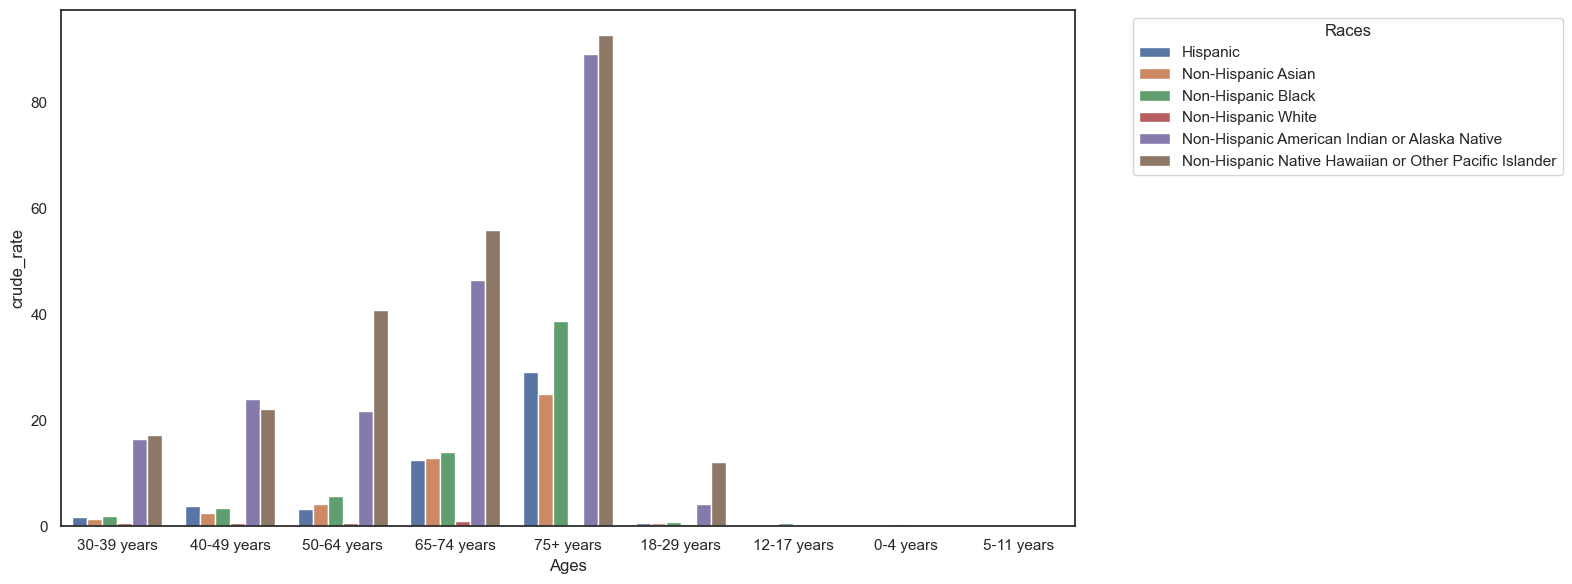

In [23]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='Ages', y='crude_rate', hue='Races', errorbar = None)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The above graph is from dataset 1: here we are graphing age ranges against the crude rate of COVID deaths. The different bars correspond to different ethnicity/race profiles

In [24]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Ages')
# plt.legend(title='Ages', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

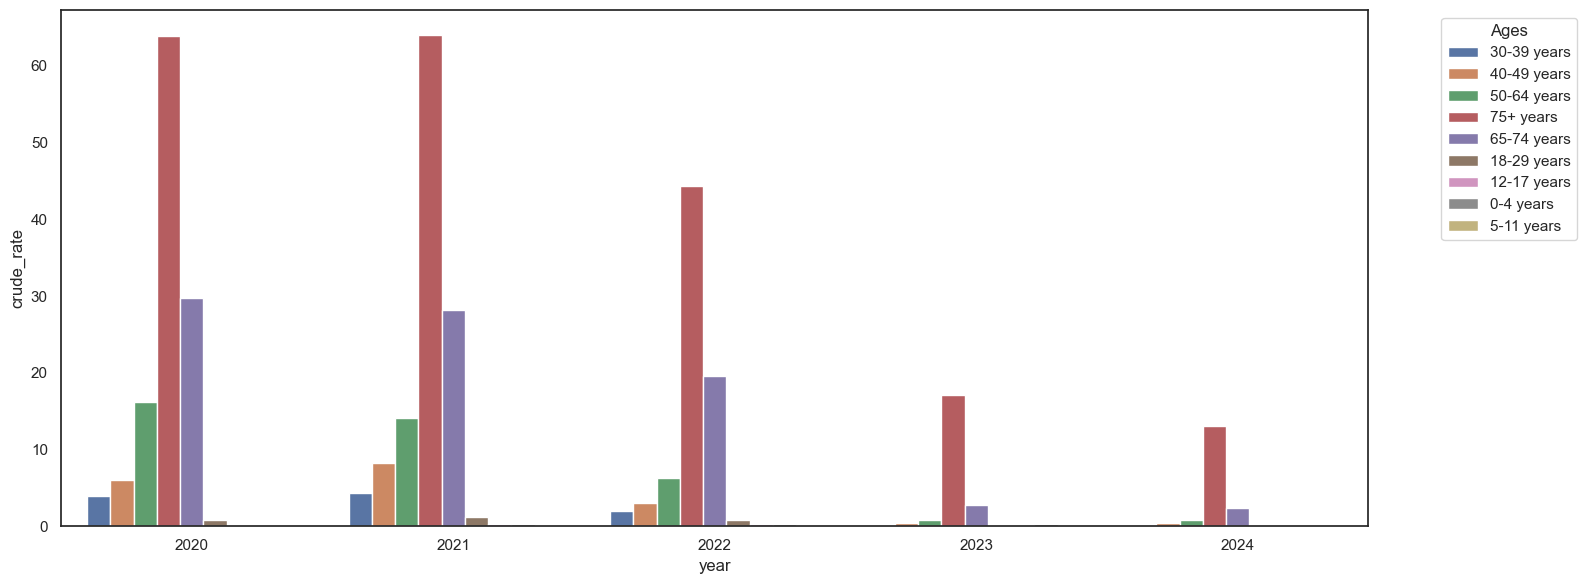

In [25]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Ages', errorbar = None)
plt.legend(title='Ages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Races')
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

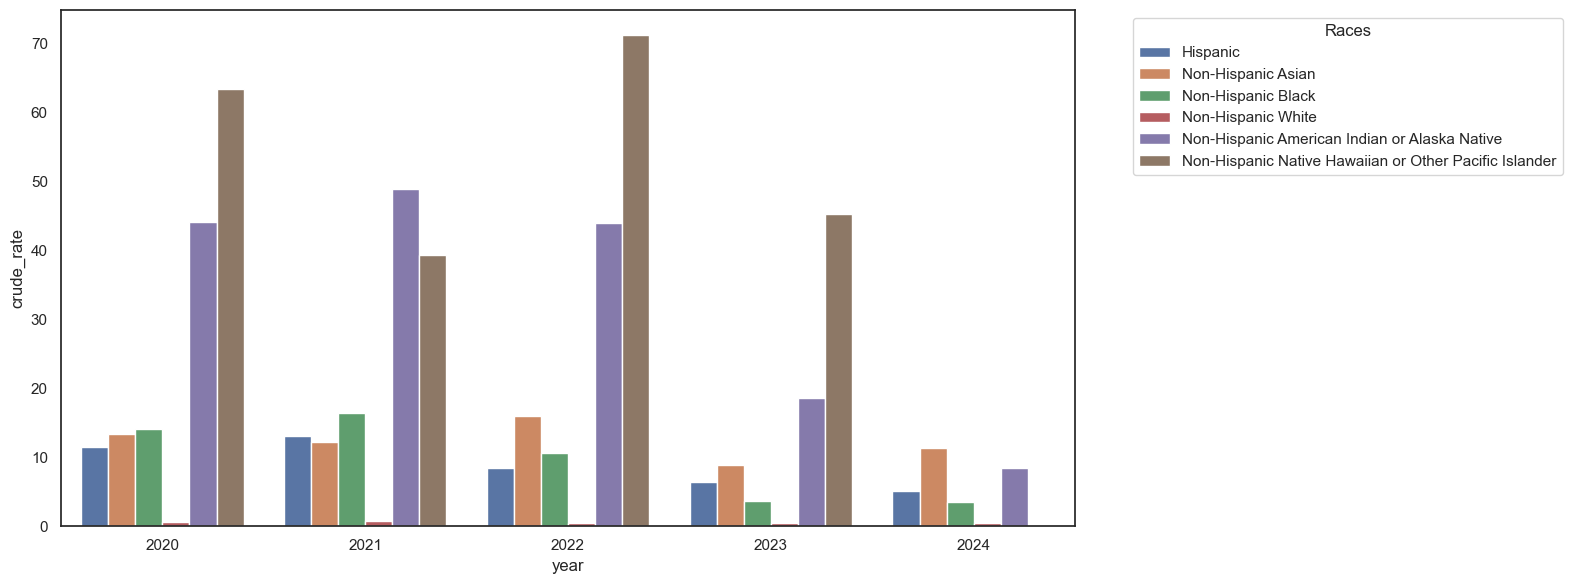

In [27]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Races', errorbar = None)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

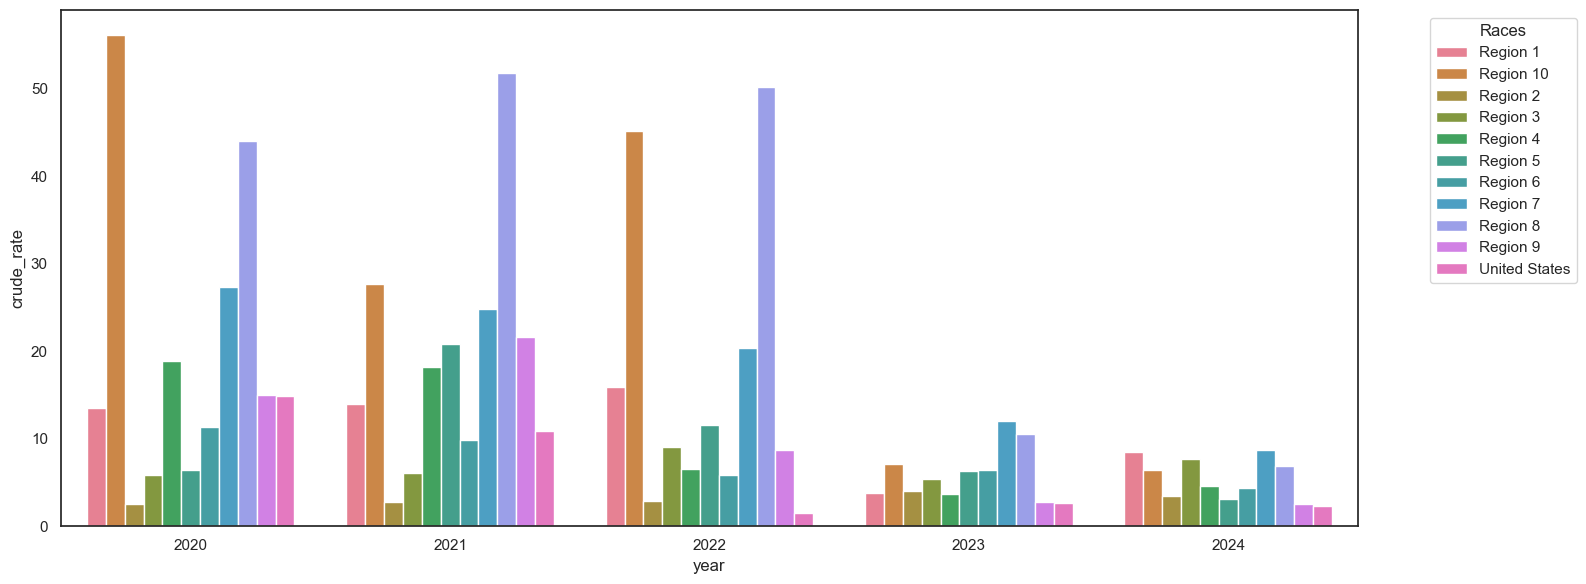

In [28]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='jurisdiction_residence', errorbar=None)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
 
# # Assuming 'df1_cleaned' is your DataFrame and it has a 'month' column with month names
# # Define the correct order of the months
# months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
 
# # Create the bar graph with months in chronological order
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='month_full', y='crude_rate', hue='Races', order=months_order, errorbar=None)
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



## dataset 4 

Now on to Dataset 4

In [ ]:
sns.set_theme(style='white', rc={'figure.figsize':(10,5)})
graph = sns.barplot(data=df4_cleaned, x='Races', y='COVID_deaths', hue='jurisdiction_residence', errorbar = None)
graph.set_xticks(graph.get_xticks())
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

In [ ]:
sns.set_theme(style='white', rc={'figure.figsize':(10,5)})
graph = sns.barplot(data=df4_cleaned, x='Sex', y='COVID_deaths', hue='jurisdiction_residence', errorbar = None)
graph.set_xticks(graph.get_xticks())
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

In [ ]:
sns.set_theme(style='white', rc={'figure.figsize':(10,5)})
graph = sns.barplot(data=df4_cleaned, x='year', y='crude_COVID_rate_ann', hue = 'Sex', errorbar = None,  palette="viridis")
graph.set_xticks(graph.get_xticks())
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

# Testing code

In [ ]:
# # Convert the 'data_period_start' column to datetime format
# df1_cleaned['data_period_start'] = pd.to_datetime(df1_cleaned['data_period_start'], format='%m/%d/%Y')
 
# # Create new columns for month (full name) and year
# df1_cleaned['month_full'] = df1_cleaned['data_period_start'].dt.strftime('%B')
# df1_cleaned['year'] = df1_cleaned['data_period_start'].dt.year

# df1_cleaned.columns

In [ ]:
#df1_cleaned.head()

In [ ]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Ages')
# plt.legend(title='Ages', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

crude rate by year, hue is age ranges

In [ ]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Races')
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

Crude rate by year, hue is races

In [ ]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='Races', errorbar=None)
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='jurisdiction_residence', errorbar=None)
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.lineplot(data=df1_cleaned, x='month_full', y='crude_rate', hue='year', errorbar=None)
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

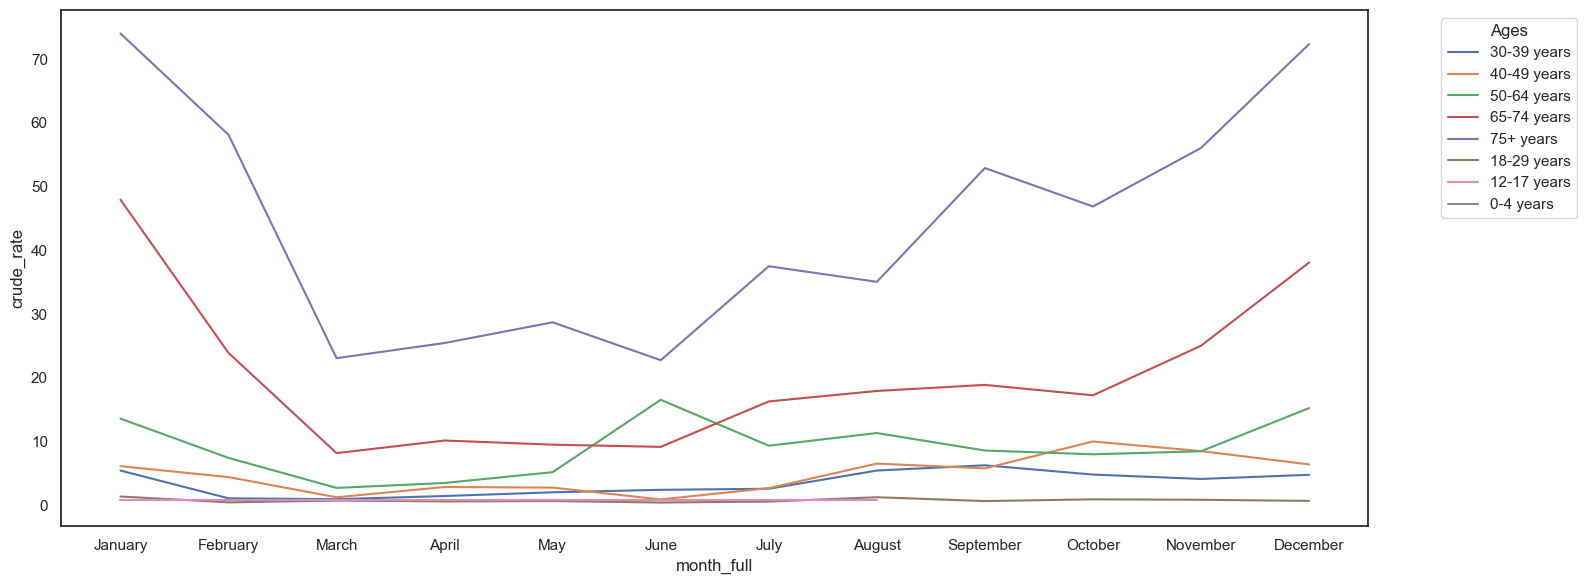

In [84]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df1_cleaned['month_full'] = pd.Categorical(df1_cleaned['month_full'], categories=months_order, ordered=True)

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.lineplot(data=df1_cleaned, x='month_full', y='crude_rate', hue='Ages', errorbar=None)
plt.legend(title='Ages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
 
# # Assuming 'df1_cleaned' is your DataFrame and it has a 'month' column with month names
# # Define the correct order of the months
# months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
 
# # Create the bar graph with months in chronological order
# sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
# graph = sns.barplot(data=df1_cleaned, x='month_full', y='crude_rate', hue='Races', order=months_order, errorbar=None)
# plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



In [ ]:
plt.figure()
sns.pairplot(df1_cleaned, vars=['covid_deaths', 'crude_rate'], hue = "Ages")
plt.show()

## extra graph testing

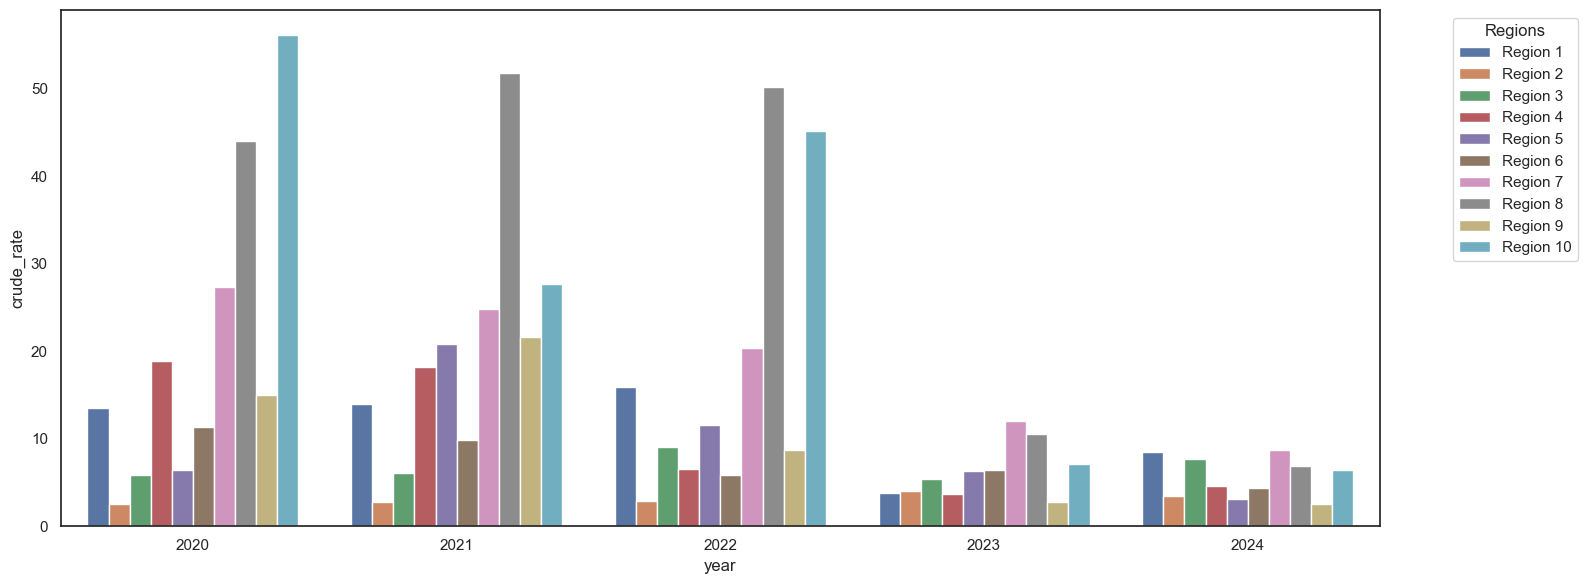

In [86]:
df1_cleaned = df1_cleaned.drop(df1_cleaned[df1_cleaned['jurisdiction_residence'] == 'United States'].index)

region_order = ['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9', 'Region 10']

df1_cleaned['jurisdiction_residence'] = pd.Categorical(df1_cleaned['jurisdiction_residence'], categories=region_order, ordered=True)


sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='year', y='crude_rate', hue='jurisdiction_residence', errorbar=None)
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



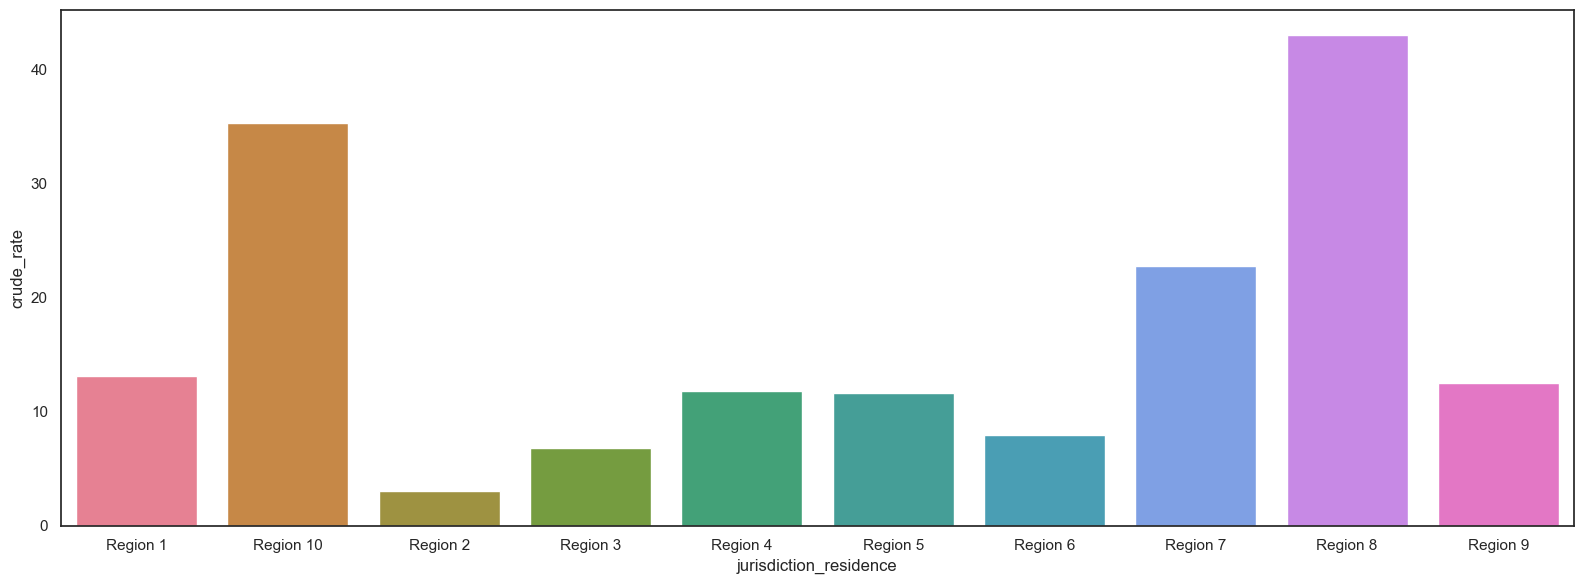

In [45]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='jurisdiction_residence', y='crude_rate', errorbar=None, palette='husl', legend = False, hue = 'jurisdiction_residence')
plt.tight_layout()
plt.show()


In [48]:
df1_cleaned.columns

Index(['data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'covid_deaths', 'crude_rate',
       'conf_int_95pct_lower_crude', 'conf_int_95pct_upper_crude', 'Ages',
       'Races', 'month_full', 'year'],
      dtype='object')

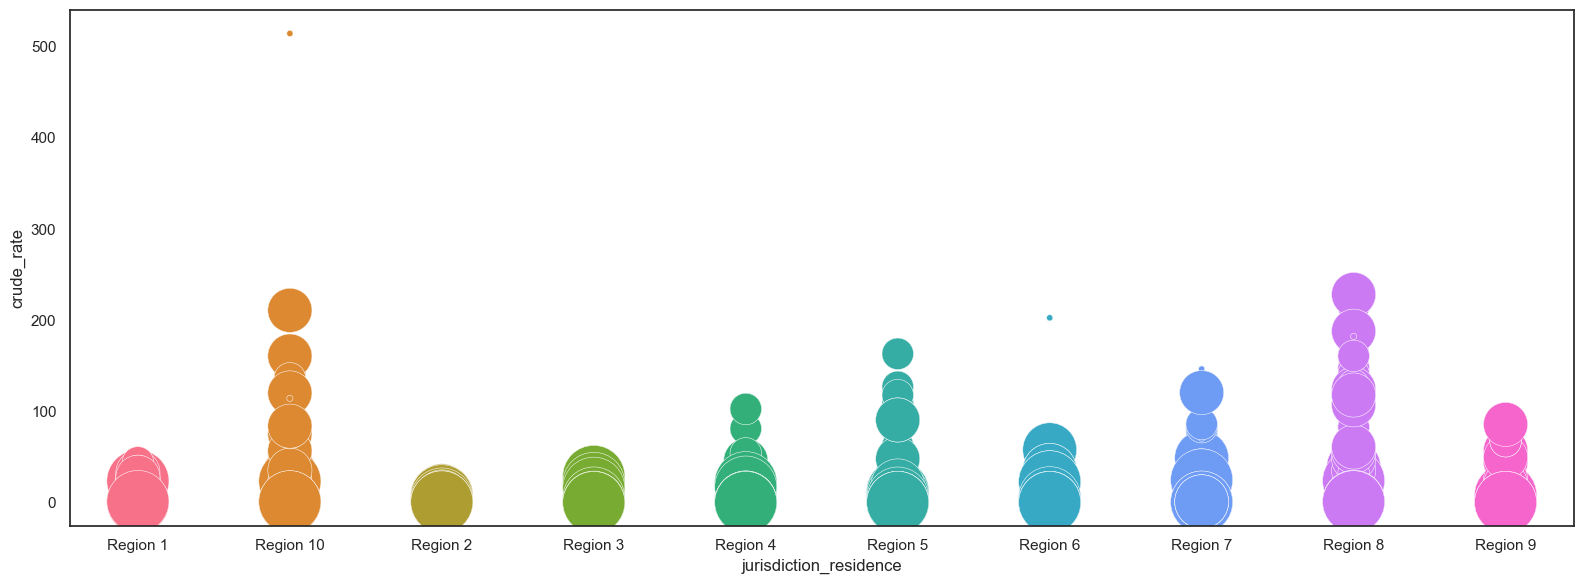

In [50]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.scatterplot(data=df1_cleaned, x='jurisdiction_residence', y='crude_rate', size = 'year', palette='husl', legend = False, sizes = (20, 2000), hue = 'jurisdiction_residence')
plt.tight_layout()
plt.show()



#sns.scatterplot(data=df, x="petal_width", y="petal_length", size="sepal_width", legend=False, sizes=(20, 2000))


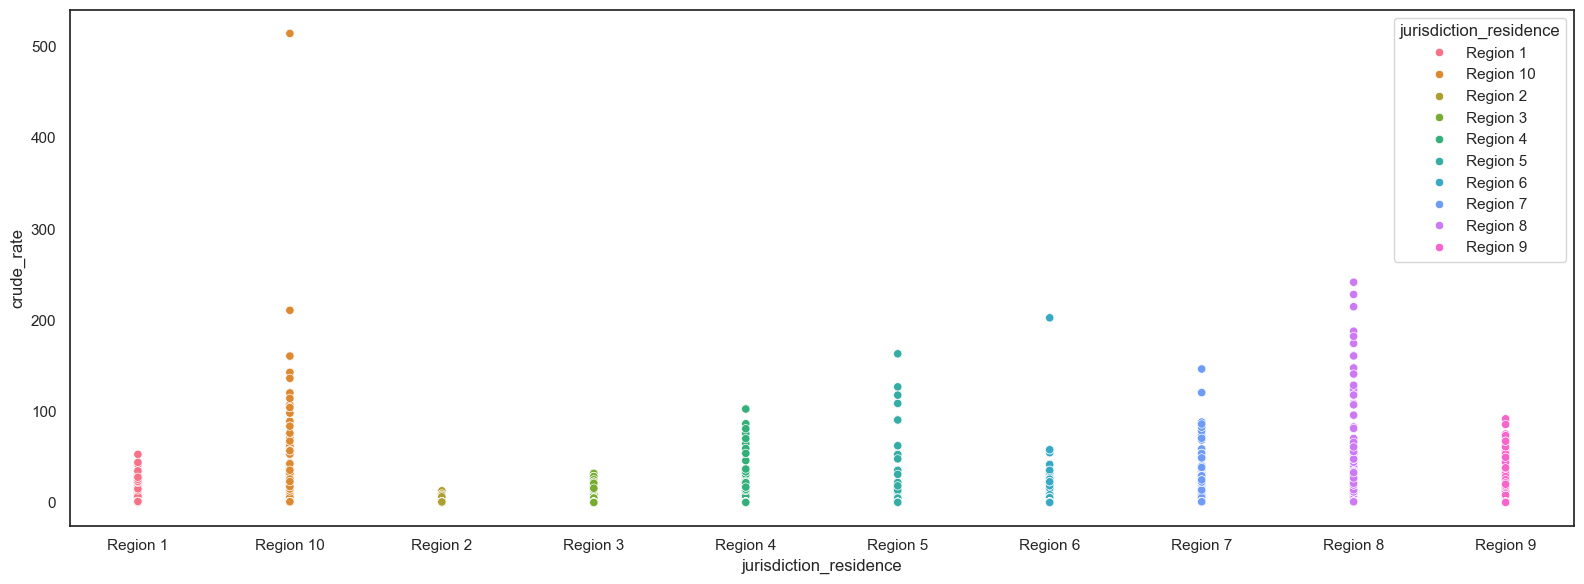

In [53]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.scatterplot(data=df1_cleaned, x='jurisdiction_residence', y='crude_rate', palette='husl', legend = True, hue = 'jurisdiction_residence')
plt.tight_layout()
plt.show()


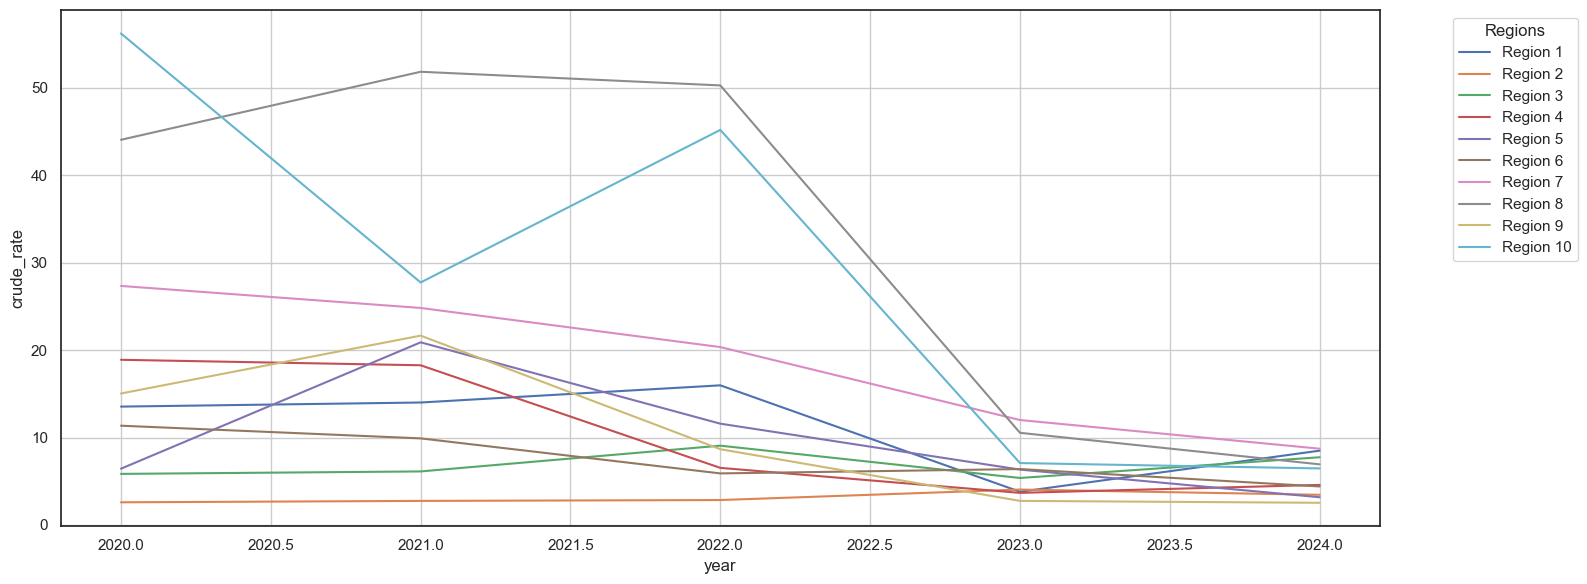

In [87]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.lineplot(data=df1_cleaned, x='year', y='crude_rate', hue='jurisdiction_residence', errorbar=None)
plt.grid(True)
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

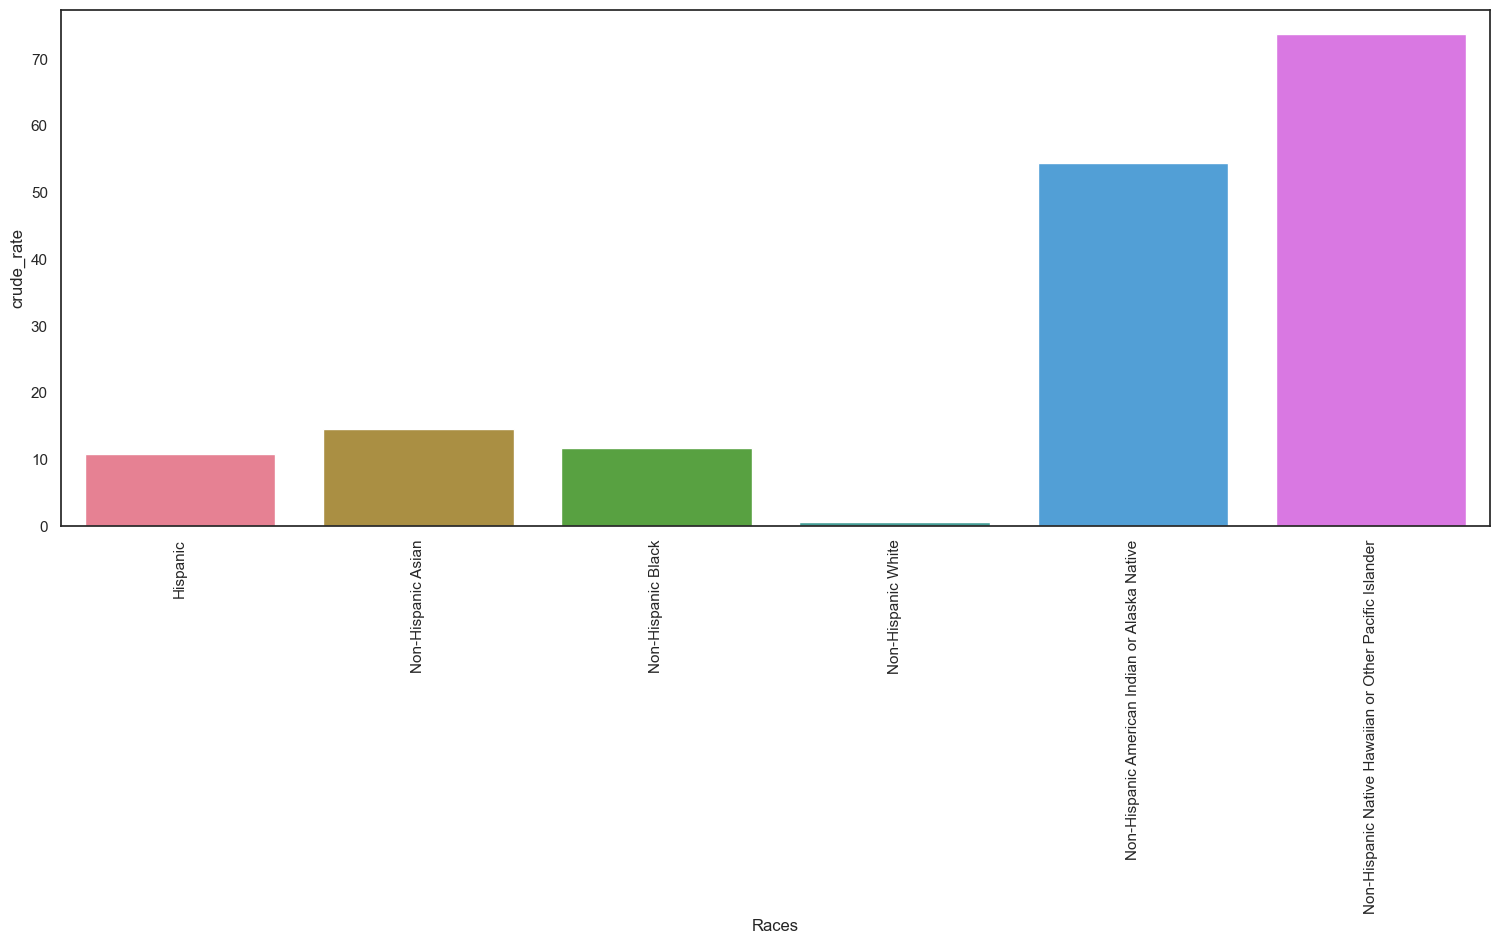

In [67]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='Races', y='crude_rate', errorbar = None, hue = 'Races', palette = 'husl')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

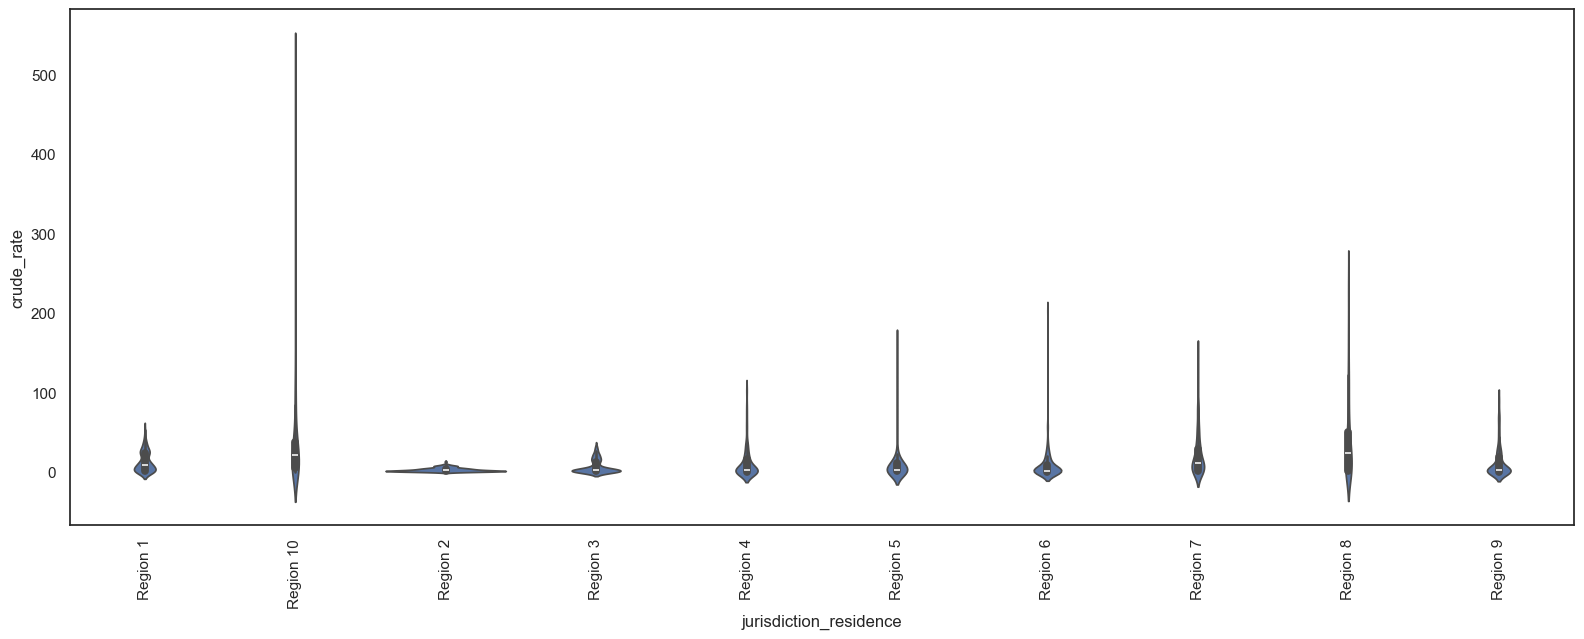

In [69]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.violinplot(x=df1_cleaned["jurisdiction_residence"], y=df1_cleaned["crude_rate"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

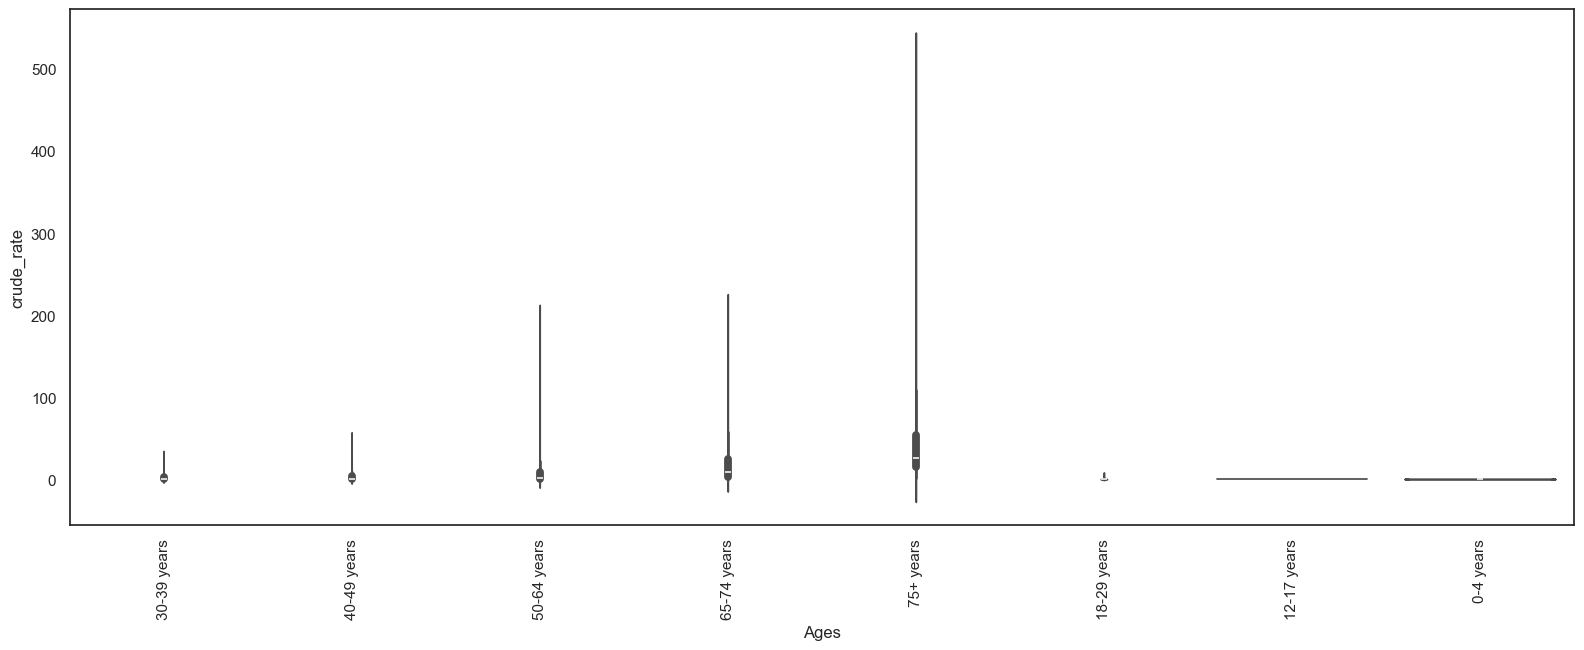

In [70]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.violinplot(x=df1_cleaned["Ages"], y=df1_cleaned["crude_rate"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [76]:
df1_cleaned.columns

Index(['data_as_of', 'jurisdiction_residence', 'data_period_start',
       'data_period_end', 'group', 'covid_deaths', 'crude_rate',
       'conf_int_95pct_lower_crude', 'conf_int_95pct_upper_crude', 'Ages',
       'Races', 'month_full', 'year'],
      dtype='object')

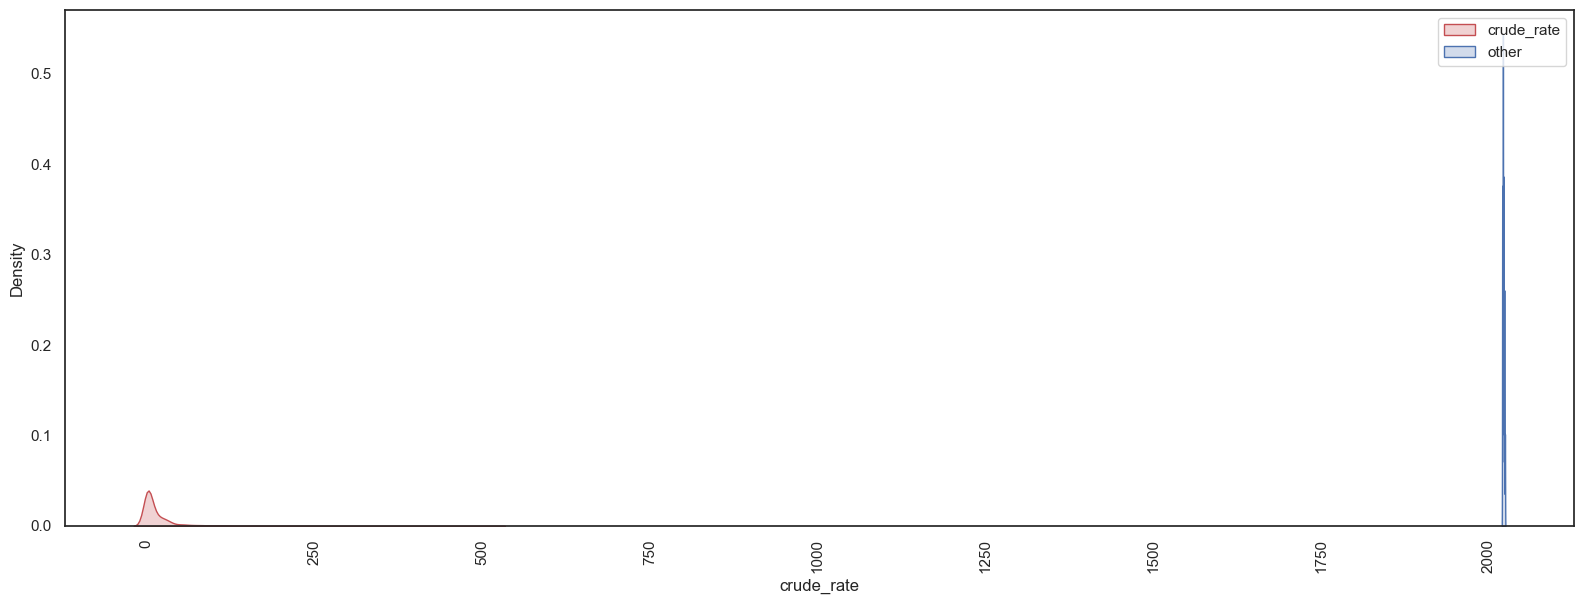

In [79]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.kdeplot(df1_cleaned['crude_rate'], fill = True, color = 'r', label = 'crude_rate')
graph = sns.kdeplot(df1_cleaned['year'], fill = True, color = 'b', label = 'other')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# fig = sns.kdeplot(df['sepal_width'], fill=True, color="r",label='sepal_width')
# fig = sns.kdeplot(df['sepal_length'],fill=True, color="b",label='sepal_length')
# plt.legend(loc='best') # to see legend
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


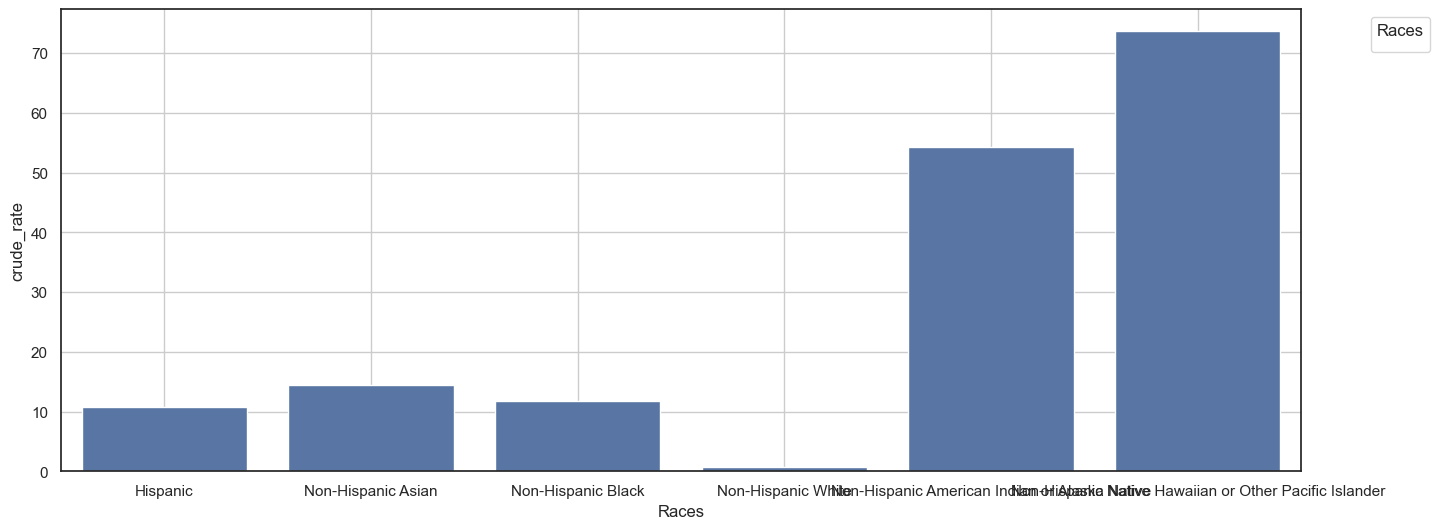

In [89]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='Races', y='crude_rate', errorbar=None)
plt.grid(True)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

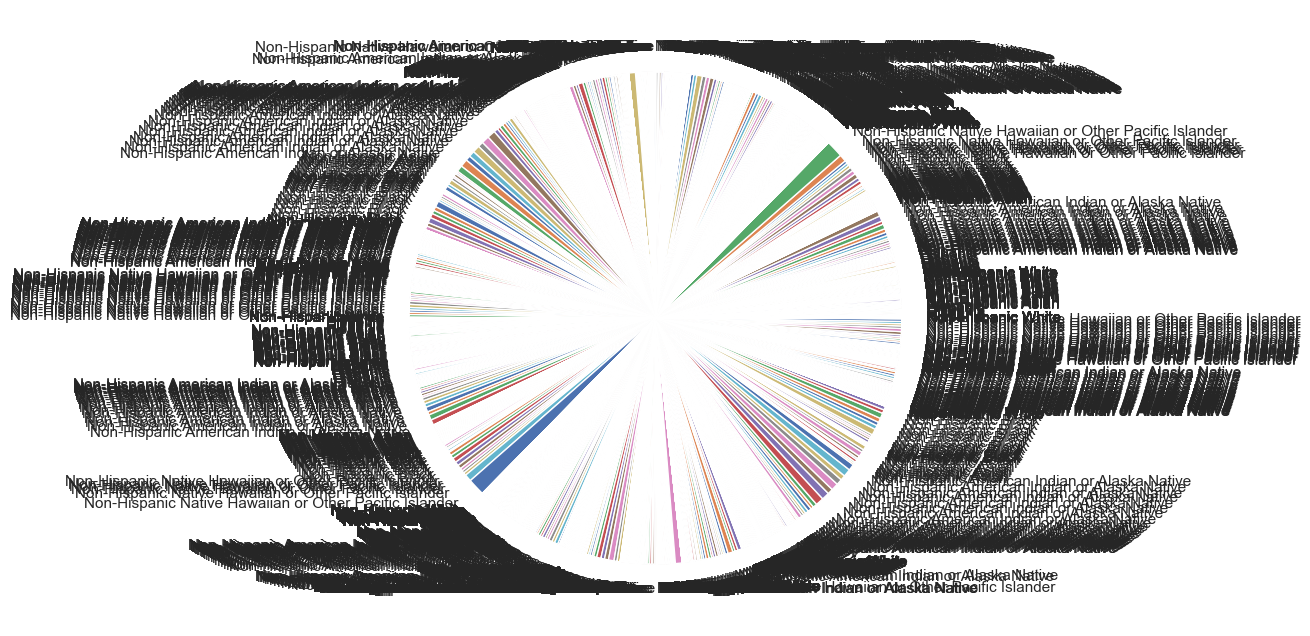

In [90]:
plt.figure(figsize=(8, 8))
plt.pie(df1_cleaned['crude_rate'], labels=df1_cleaned['Races'])
plt.show()

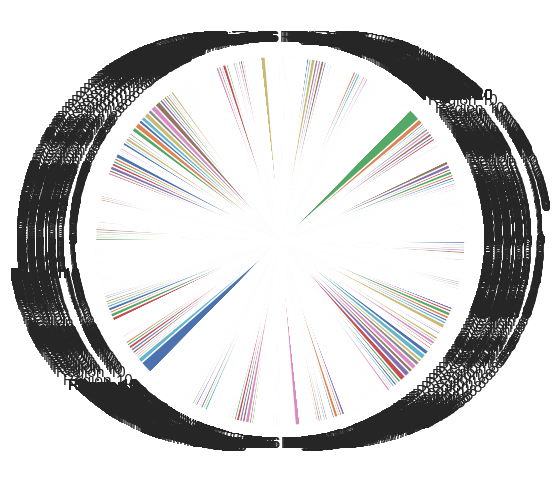

In [116]:
#plt.figure(figsize=(8, 8))
plt.pie(df1_cleaned['crude_rate'], labels=df1_cleaned['jurisdiction_residence'])
plt.show()

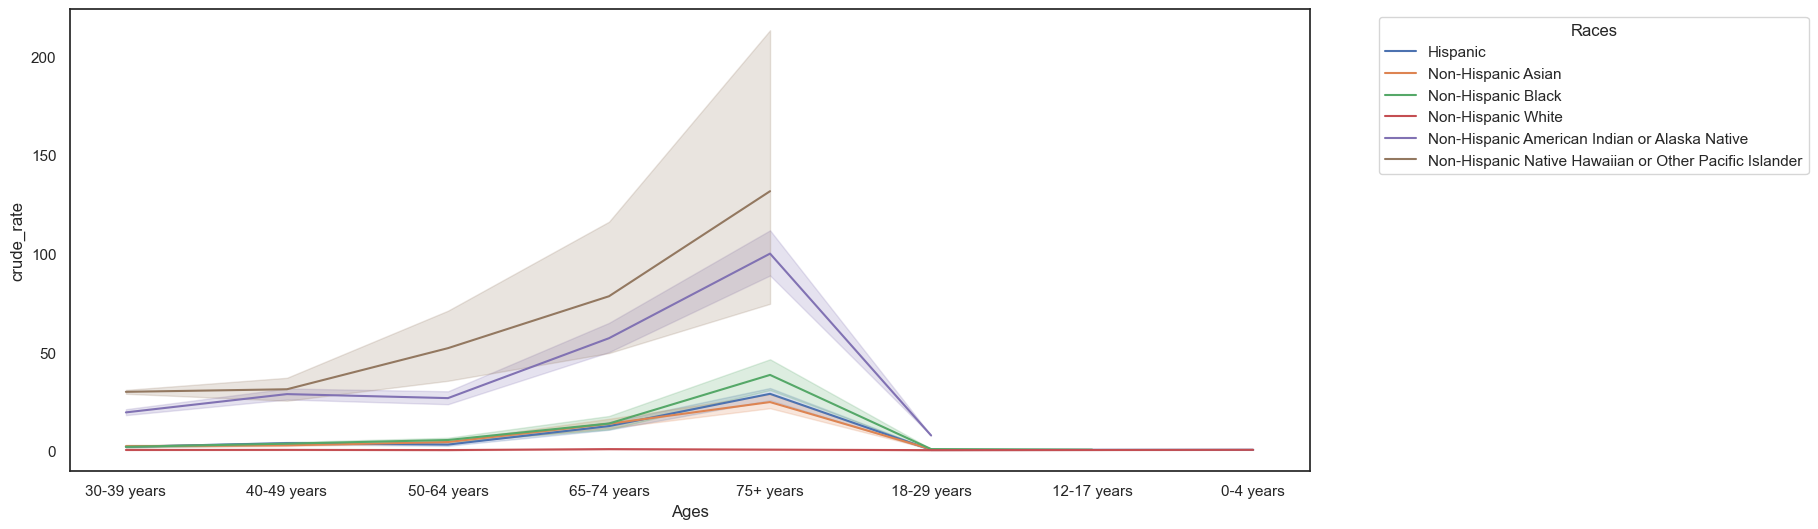

In [93]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.lineplot(data=df1_cleaned, x='Ages', y='crude_rate', hue='Races')
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

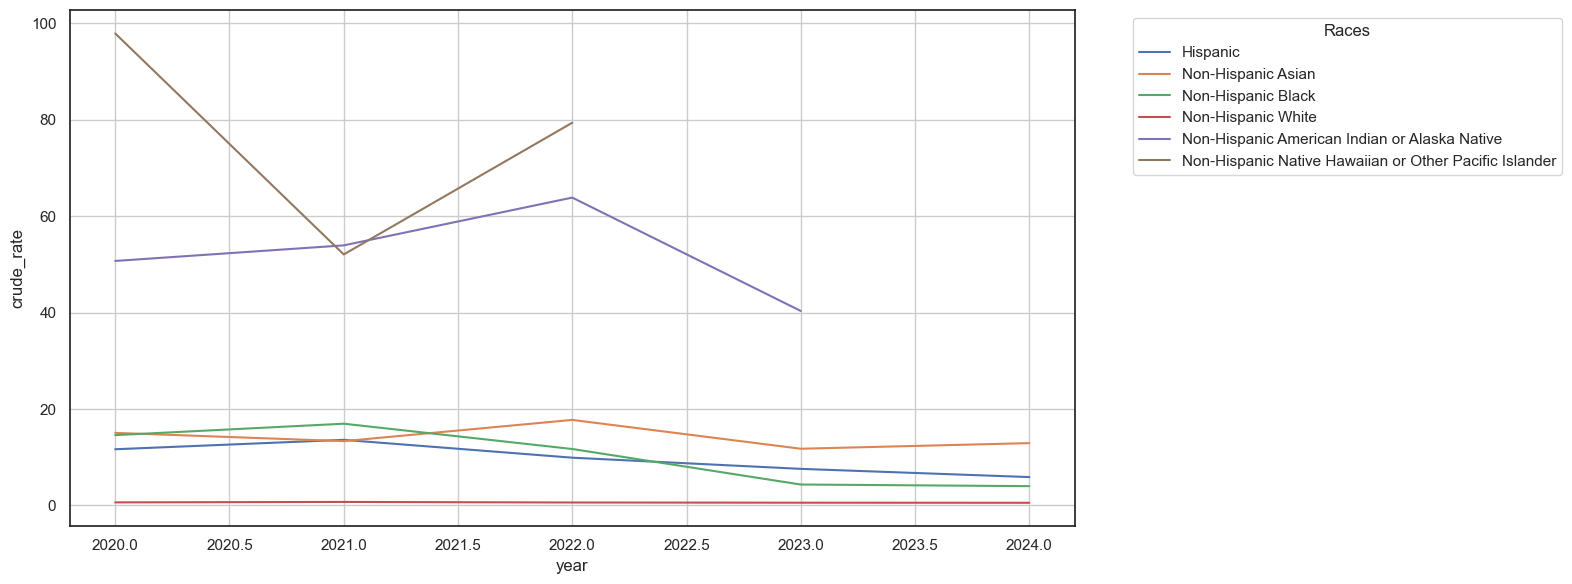

In [95]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.lineplot(data=df1_cleaned, x='year', y='crude_rate', hue='Races', errorbar=None)
plt.grid(True)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

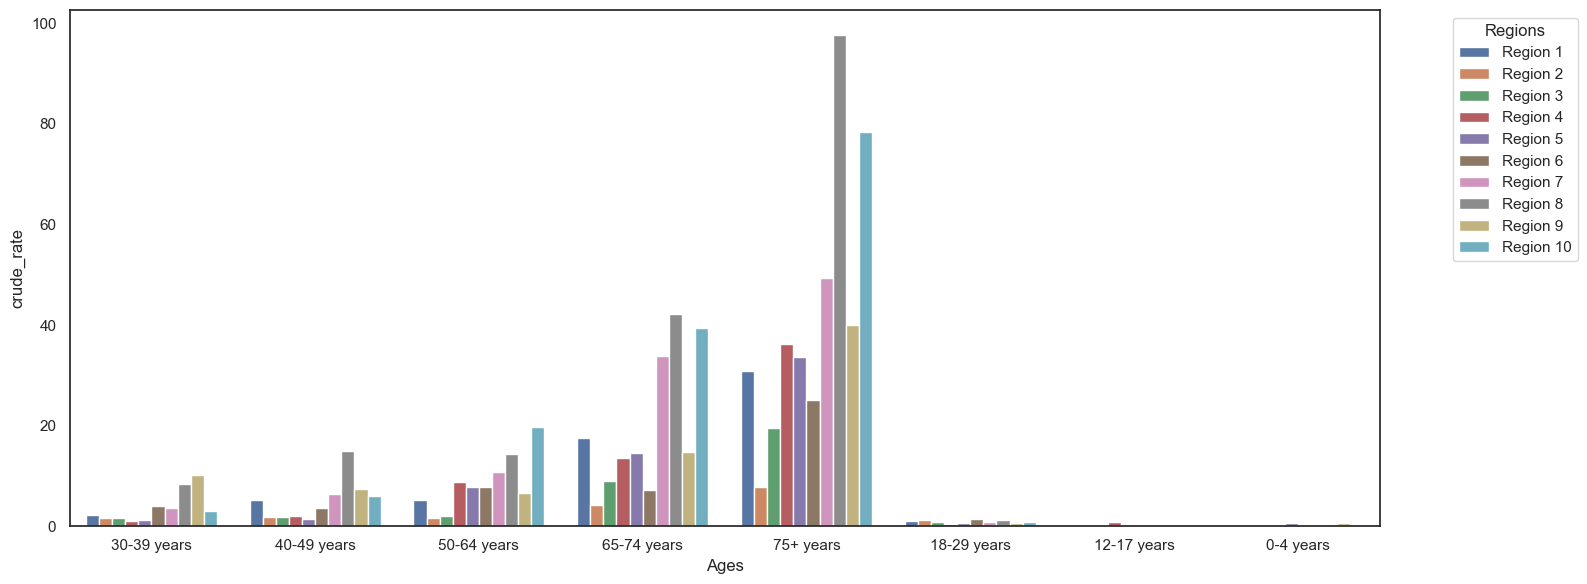

In [98]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='Ages', y='crude_rate', hue='jurisdiction_residence', errorbar = None)
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

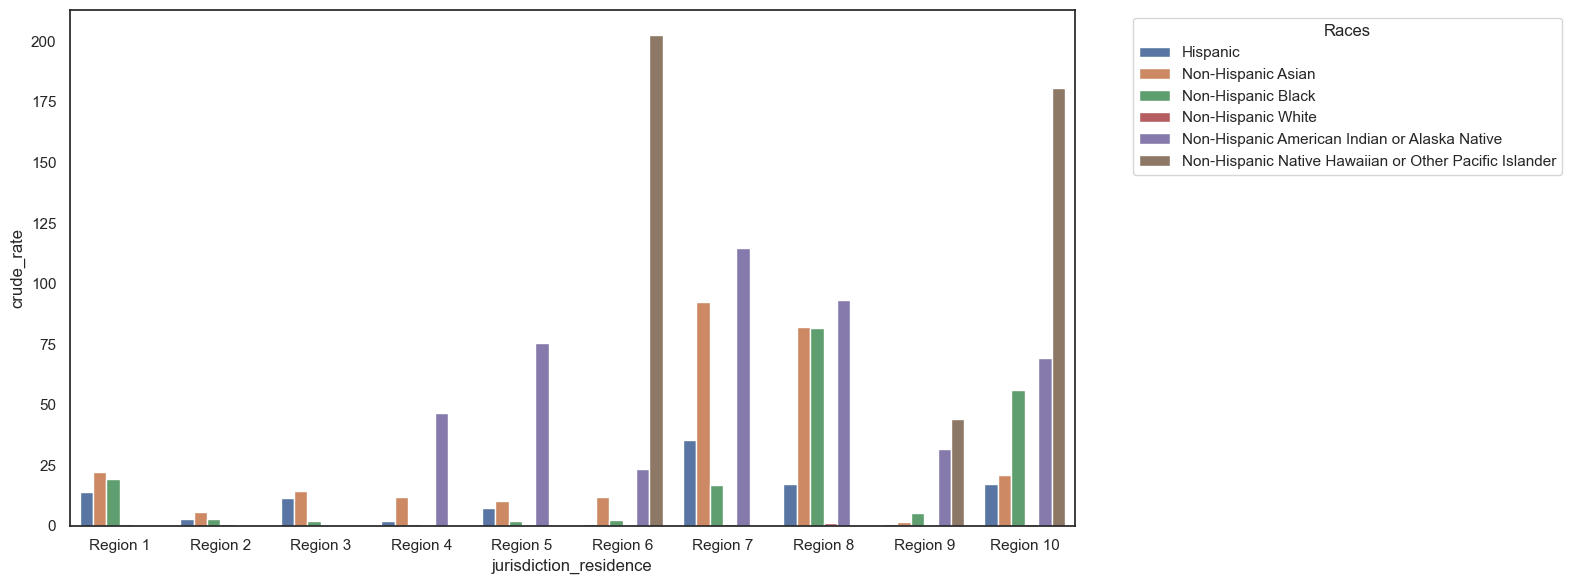

In [102]:
sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='jurisdiction_residence', y='crude_rate', hue='Races', errorbar = None)
plt.legend(title='Races', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

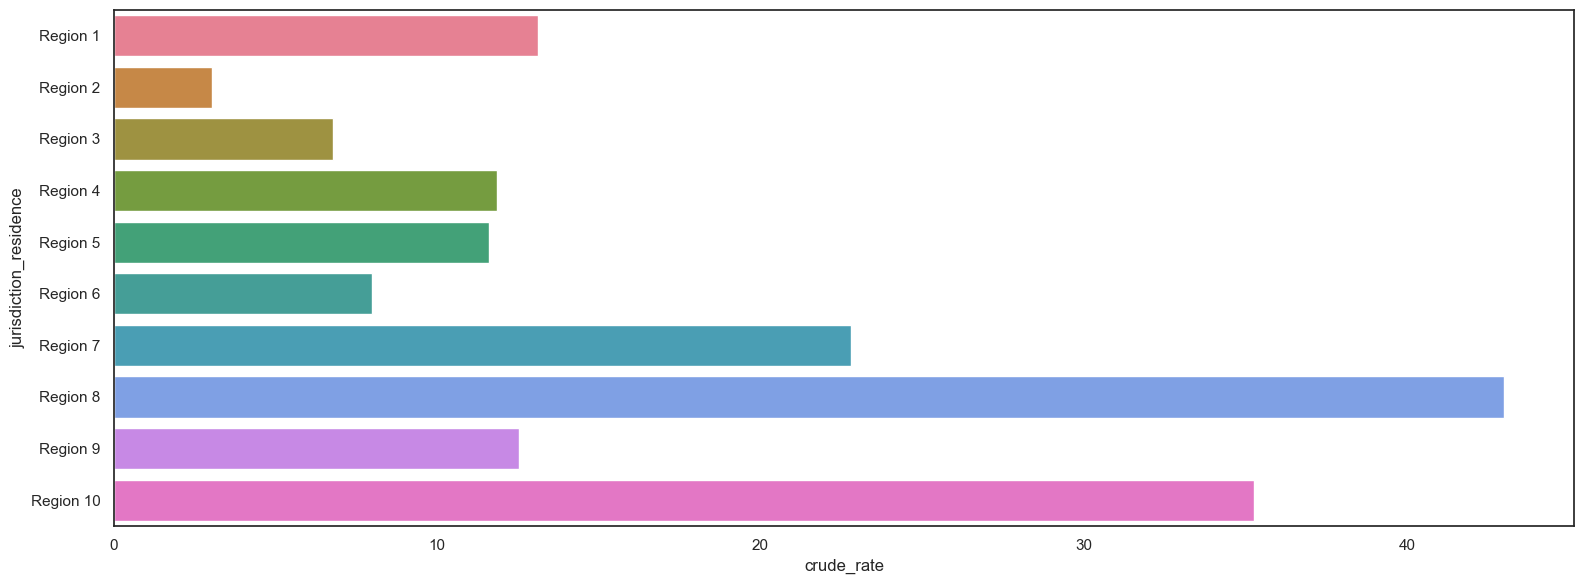

In [109]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='crude_rate', y='jurisdiction_residence', errorbar=None, legend = False, palette = 'husl', hue = 'jurisdiction_residence')
plt.tight_layout()
plt.show()

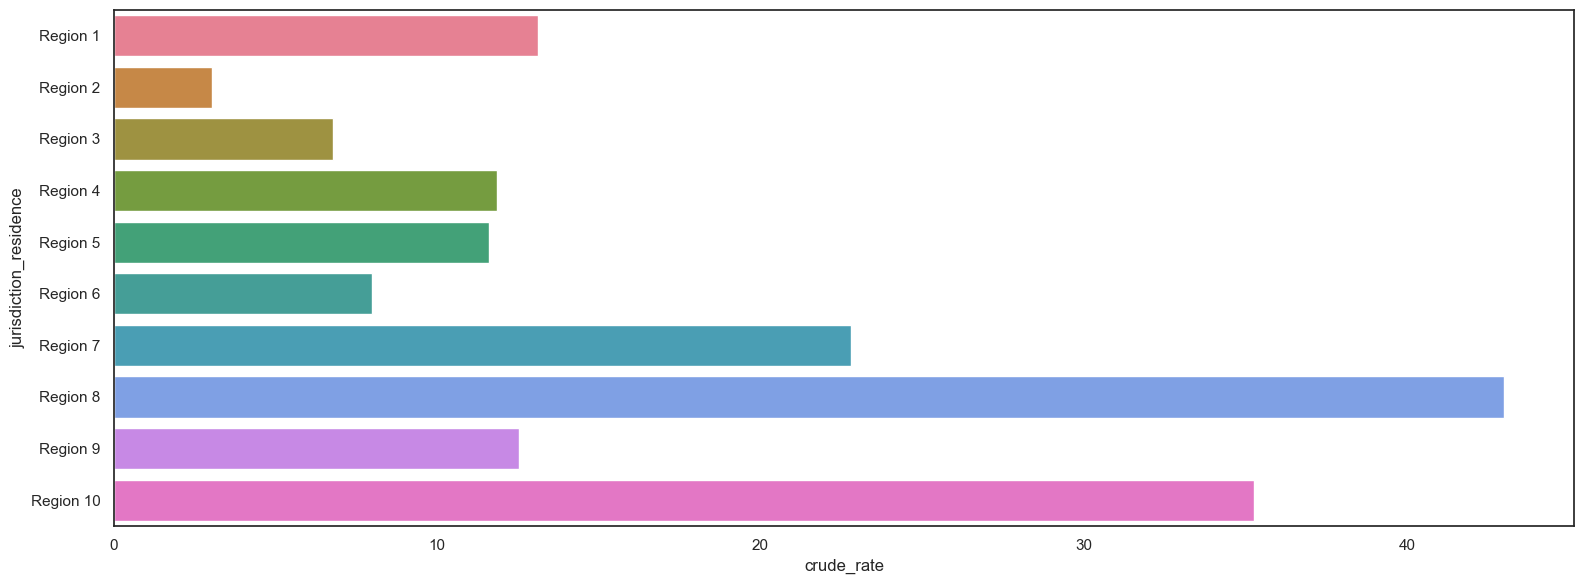

In [109]:

sns.set_theme(style='white', rc={'figure.figsize':(16,6)})
graph = sns.barplot(data=df1_cleaned, x='crude_rate', y='jurisdiction_residence', errorbar=None, legend = False, palette = 'husl', hue = 'jurisdiction_residence')
plt.tight_layout()
plt.show()